In [1]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
import numpy as np
import os
import sys

In [2]:
# get current working dir
current_dir = os.getcwd()
print(current_dir)
# append the utils direct (if you change the appended path, you must restart the kernel!)
sys.path.append(current_dir + "/..")
# import custom package (make sure the utils is added to the path)
import utils as ul

/home/fsc-jupiter/source/data_review/src/data_display


In [3]:
# define names of the bag to be displayed
bagfilename = "test_ude_vb_0726"

# select and save topics to a dictionary
csvNameList = [("mocap-UAV0.csv", True, "mocap"),
               ("mavros-imu-data.csv", True, "imu"),
               ("mavros-setpoint_raw-attitude.csv", True, "setpoint"),
               ("position_controller-target.csv", True, "target"),
               ("position_controller-output_data.csv", True, "output")]

# specify bag location
dir = current_dir  + "/../../data/flight_test/" + bagfilename + "/"
print("csv dir is: " + dir)

csv dir is: /home/fsc-jupiter/source/data_review/src/data_display/../../data/flight_test/test_ude_vb_0726/


In [4]:
# specify a start time and end time for the bag read
startT = 0
endT = 300
# this will auto read and parse the .csv files
test_data_0 = dict()
for filename in csvNameList:
    test_data_0[filename[2]] = ul.ProcessRosbagDataFromCSVWithBaseTime(dir + filename[0], startT, endT, headerTimeStamp=filename[1])

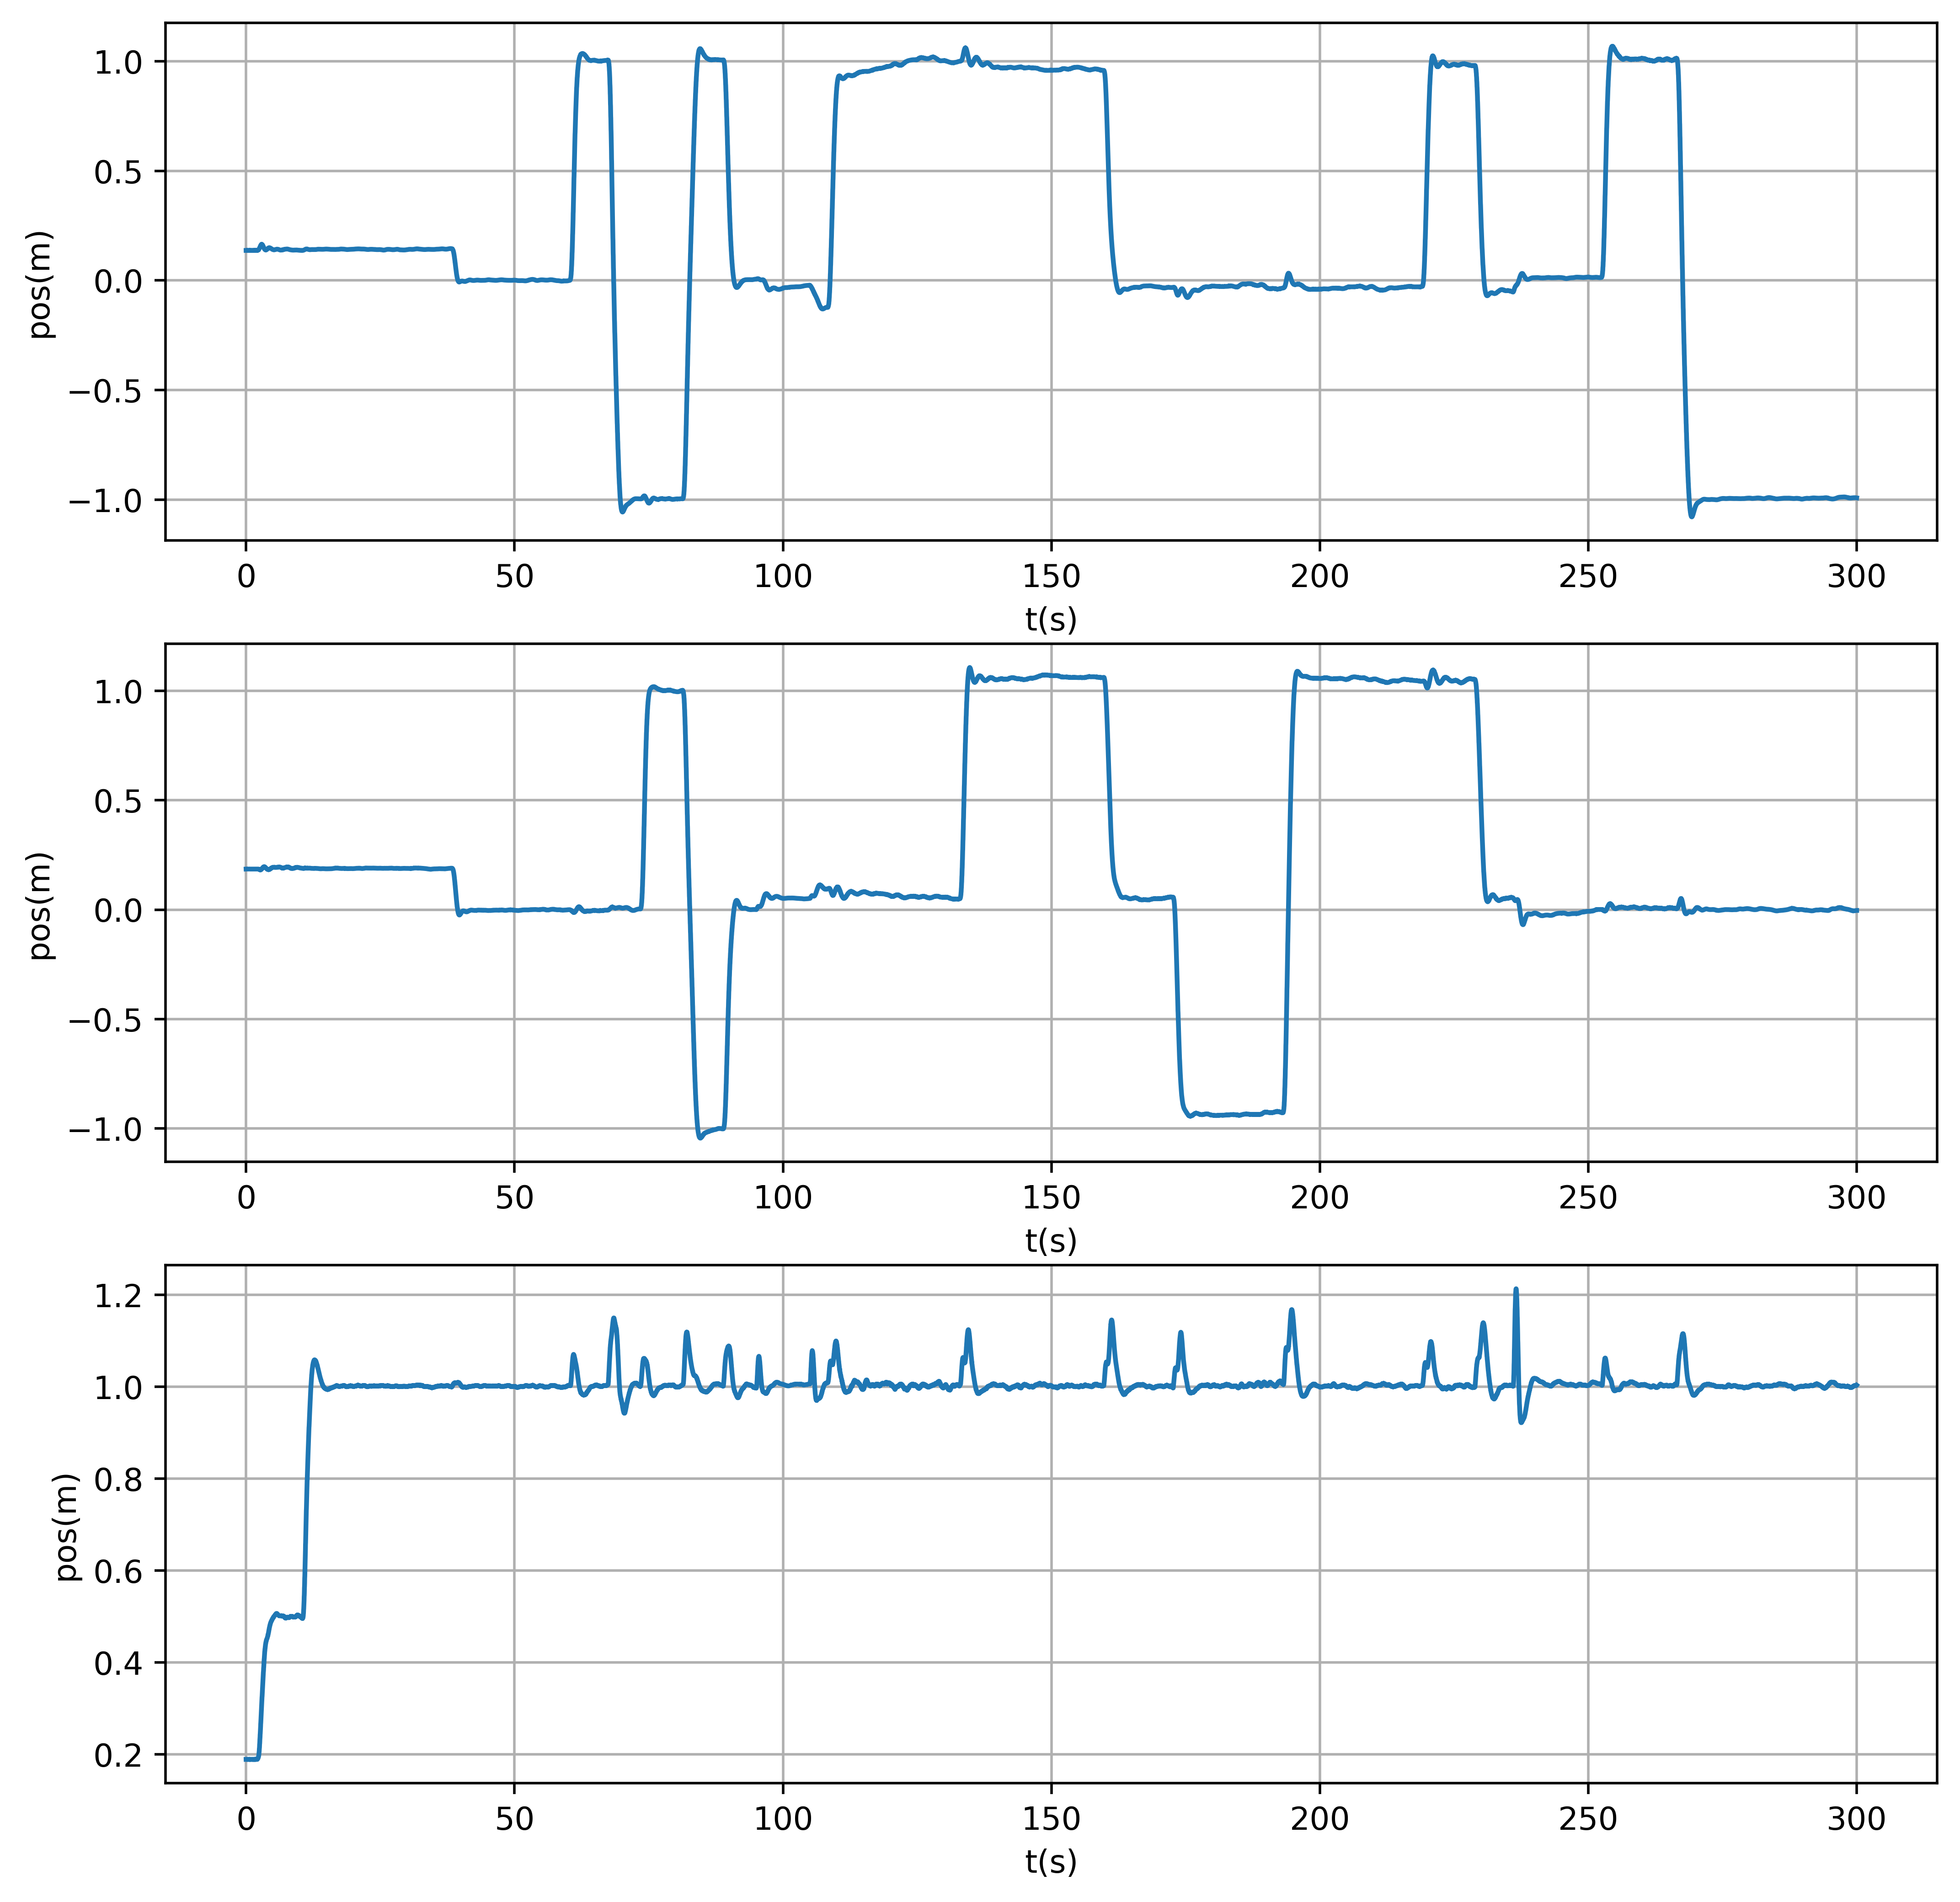

In [5]:
plt.figure(figsize=(10,10), dpi= 500)
plt.subplot(311)
plt.plot(test_data_0["mocap"]["processed_time"], test_data_0["mocap"]['pose.position.x'])
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(312)
plt.plot(test_data_0["mocap"]["processed_time"], test_data_0["mocap"]['pose.position.y'])
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(313)
plt.plot(test_data_0["mocap"]["processed_time"], test_data_0["mocap"]['pose.position.z'])
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

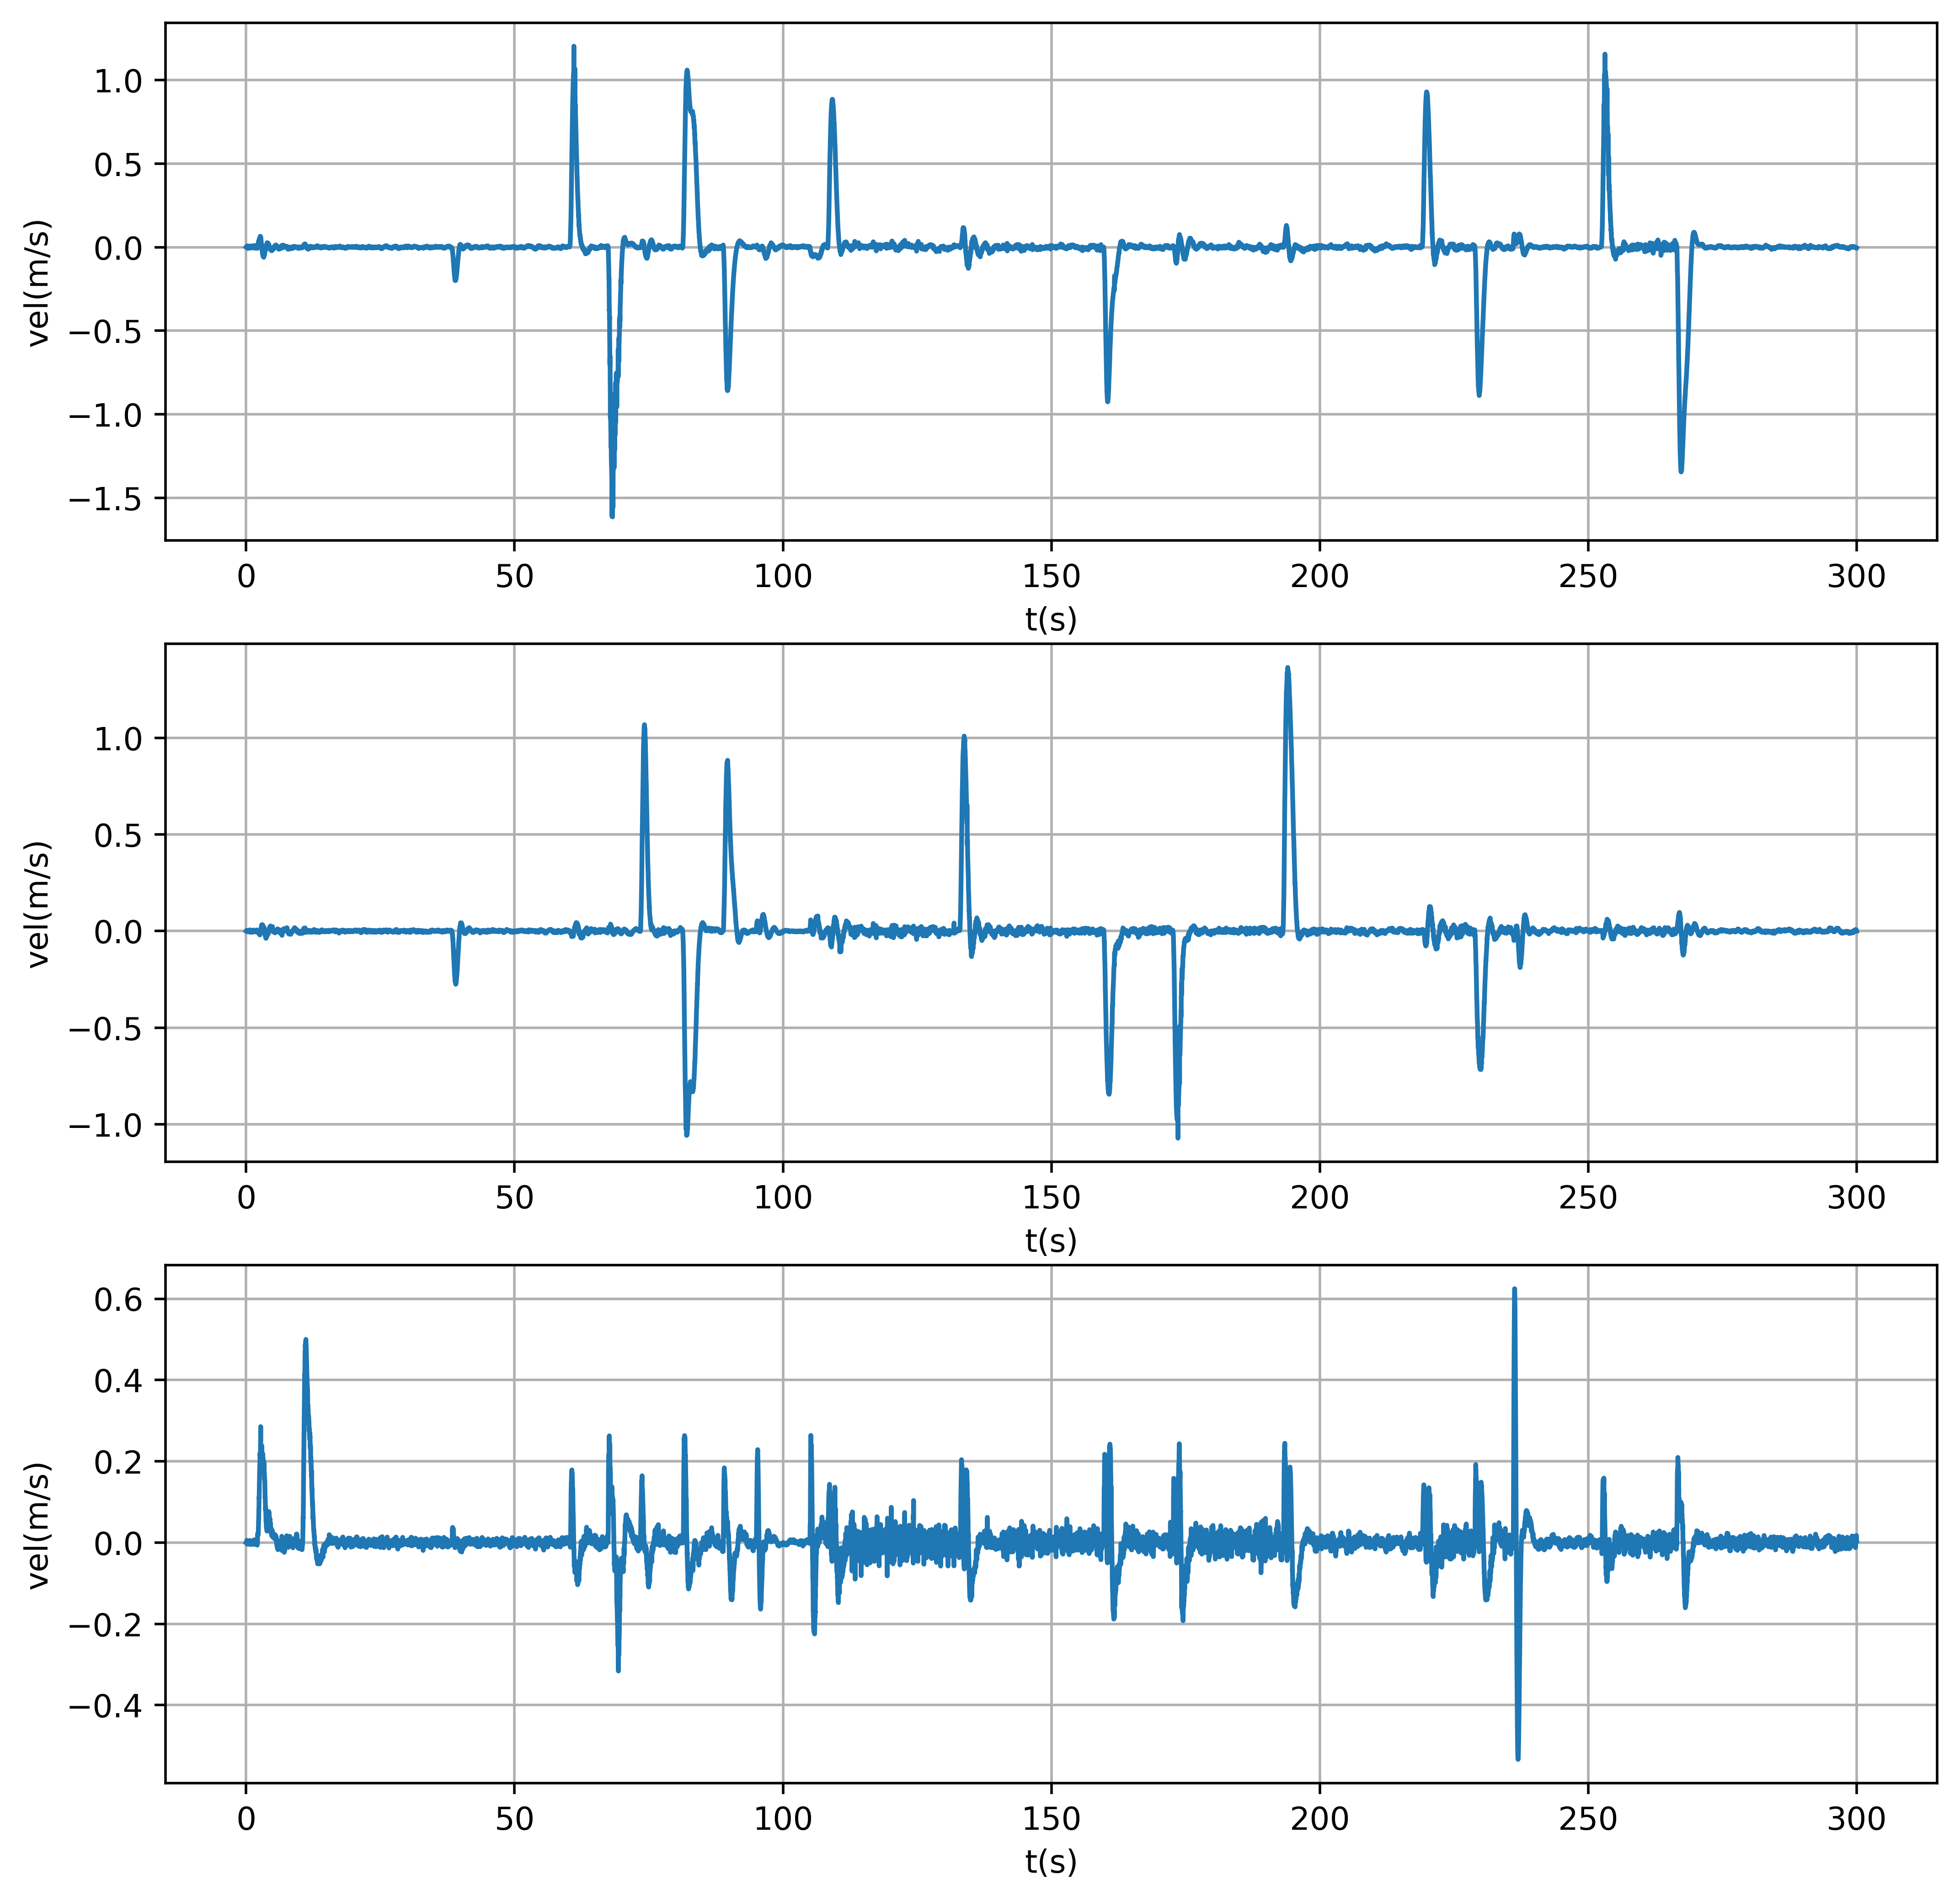

In [6]:
plt.figure(figsize=(10,10), dpi= 500)
plt.subplot(311)
plt.plot(test_data_0["mocap"]["processed_time"], test_data_0["mocap"]['twist.linear.x'])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(test_data_0["mocap"]["processed_time"], test_data_0["mocap"]['twist.linear.y'])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
plt.plot(test_data_0["mocap"]["processed_time"], test_data_0["mocap"]['twist.linear.z'])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


In [7]:
# get body angle

n = len(test_data_0["imu"]["orientation.x"])

roll = np.zeros((n,))
pitch = np.zeros((n,))
yaw = np.zeros((n,))

for i in range(n):
    r = Rotation.from_quat([test_data_0["imu"]["orientation.x"][i],
                            test_data_0["imu"]["orientation.y"][i],
                            test_data_0["imu"]["orientation.z"][i],
                            test_data_0["imu"]["orientation.w"][i]])
    euler = r.as_euler('xyz', degrees=True)
    roll[i] = euler[0]
    pitch[i] = euler[1]
    yaw[i] = euler[2]

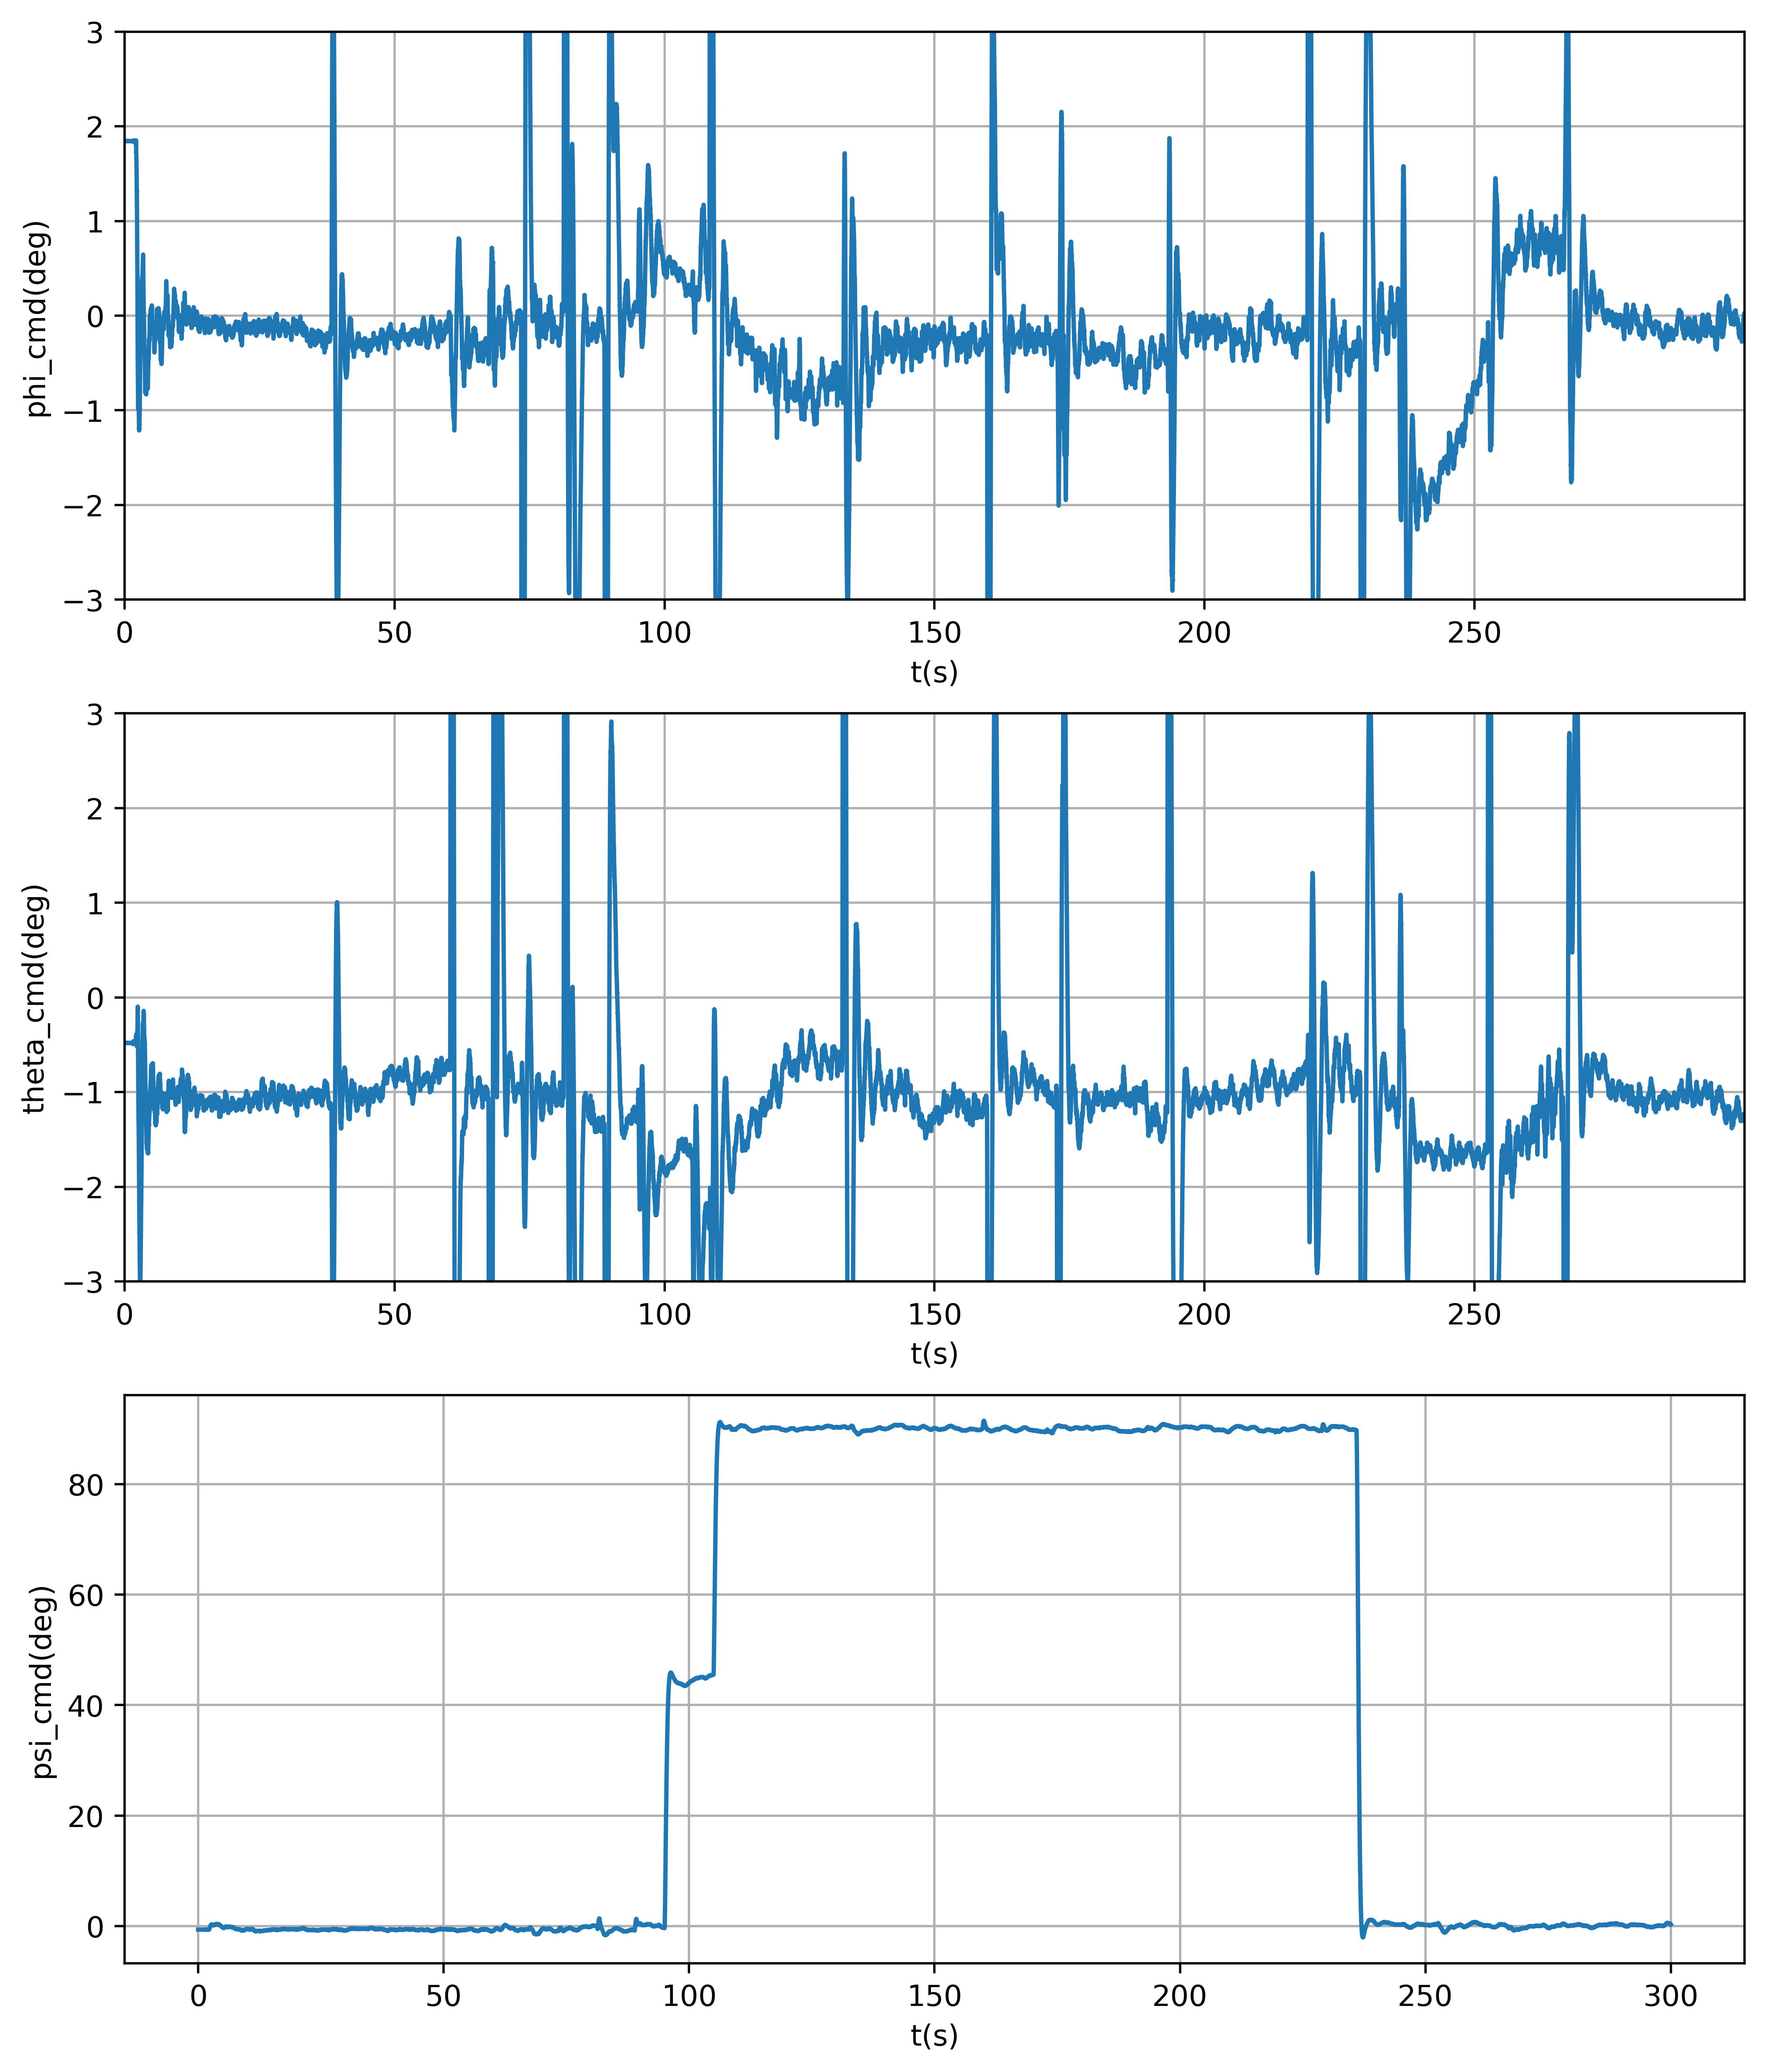

In [11]:
plt.figure(figsize=(10,12), dpi= 500)
plt.subplot(311)
plt.plot(test_data_0["imu"]["processed_time"], roll)
plt.ylabel('phi_cmd(deg)')
plt.xlabel('t(s)')
plt.axis([test_data_0["imu"]["processed_time"][0], test_data_0["imu"]["processed_time"][-1],
          -3, 3])
plt.grid(True)
plt.subplot(312)
plt.plot(test_data_0["imu"]["processed_time"], pitch)
plt.ylabel('theta_cmd(deg)')
plt.xlabel('t(s)')
plt.axis([test_data_0["imu"]["processed_time"][0], test_data_0["imu"]["processed_time"][-1],
          -3, 3])
plt.grid(True)
plt.subplot(313)
plt.plot(test_data_0["imu"]["processed_time"], yaw)
plt.ylabel('psi_cmd(deg)')
plt.xlabel('t(s)')
plt.grid(True)

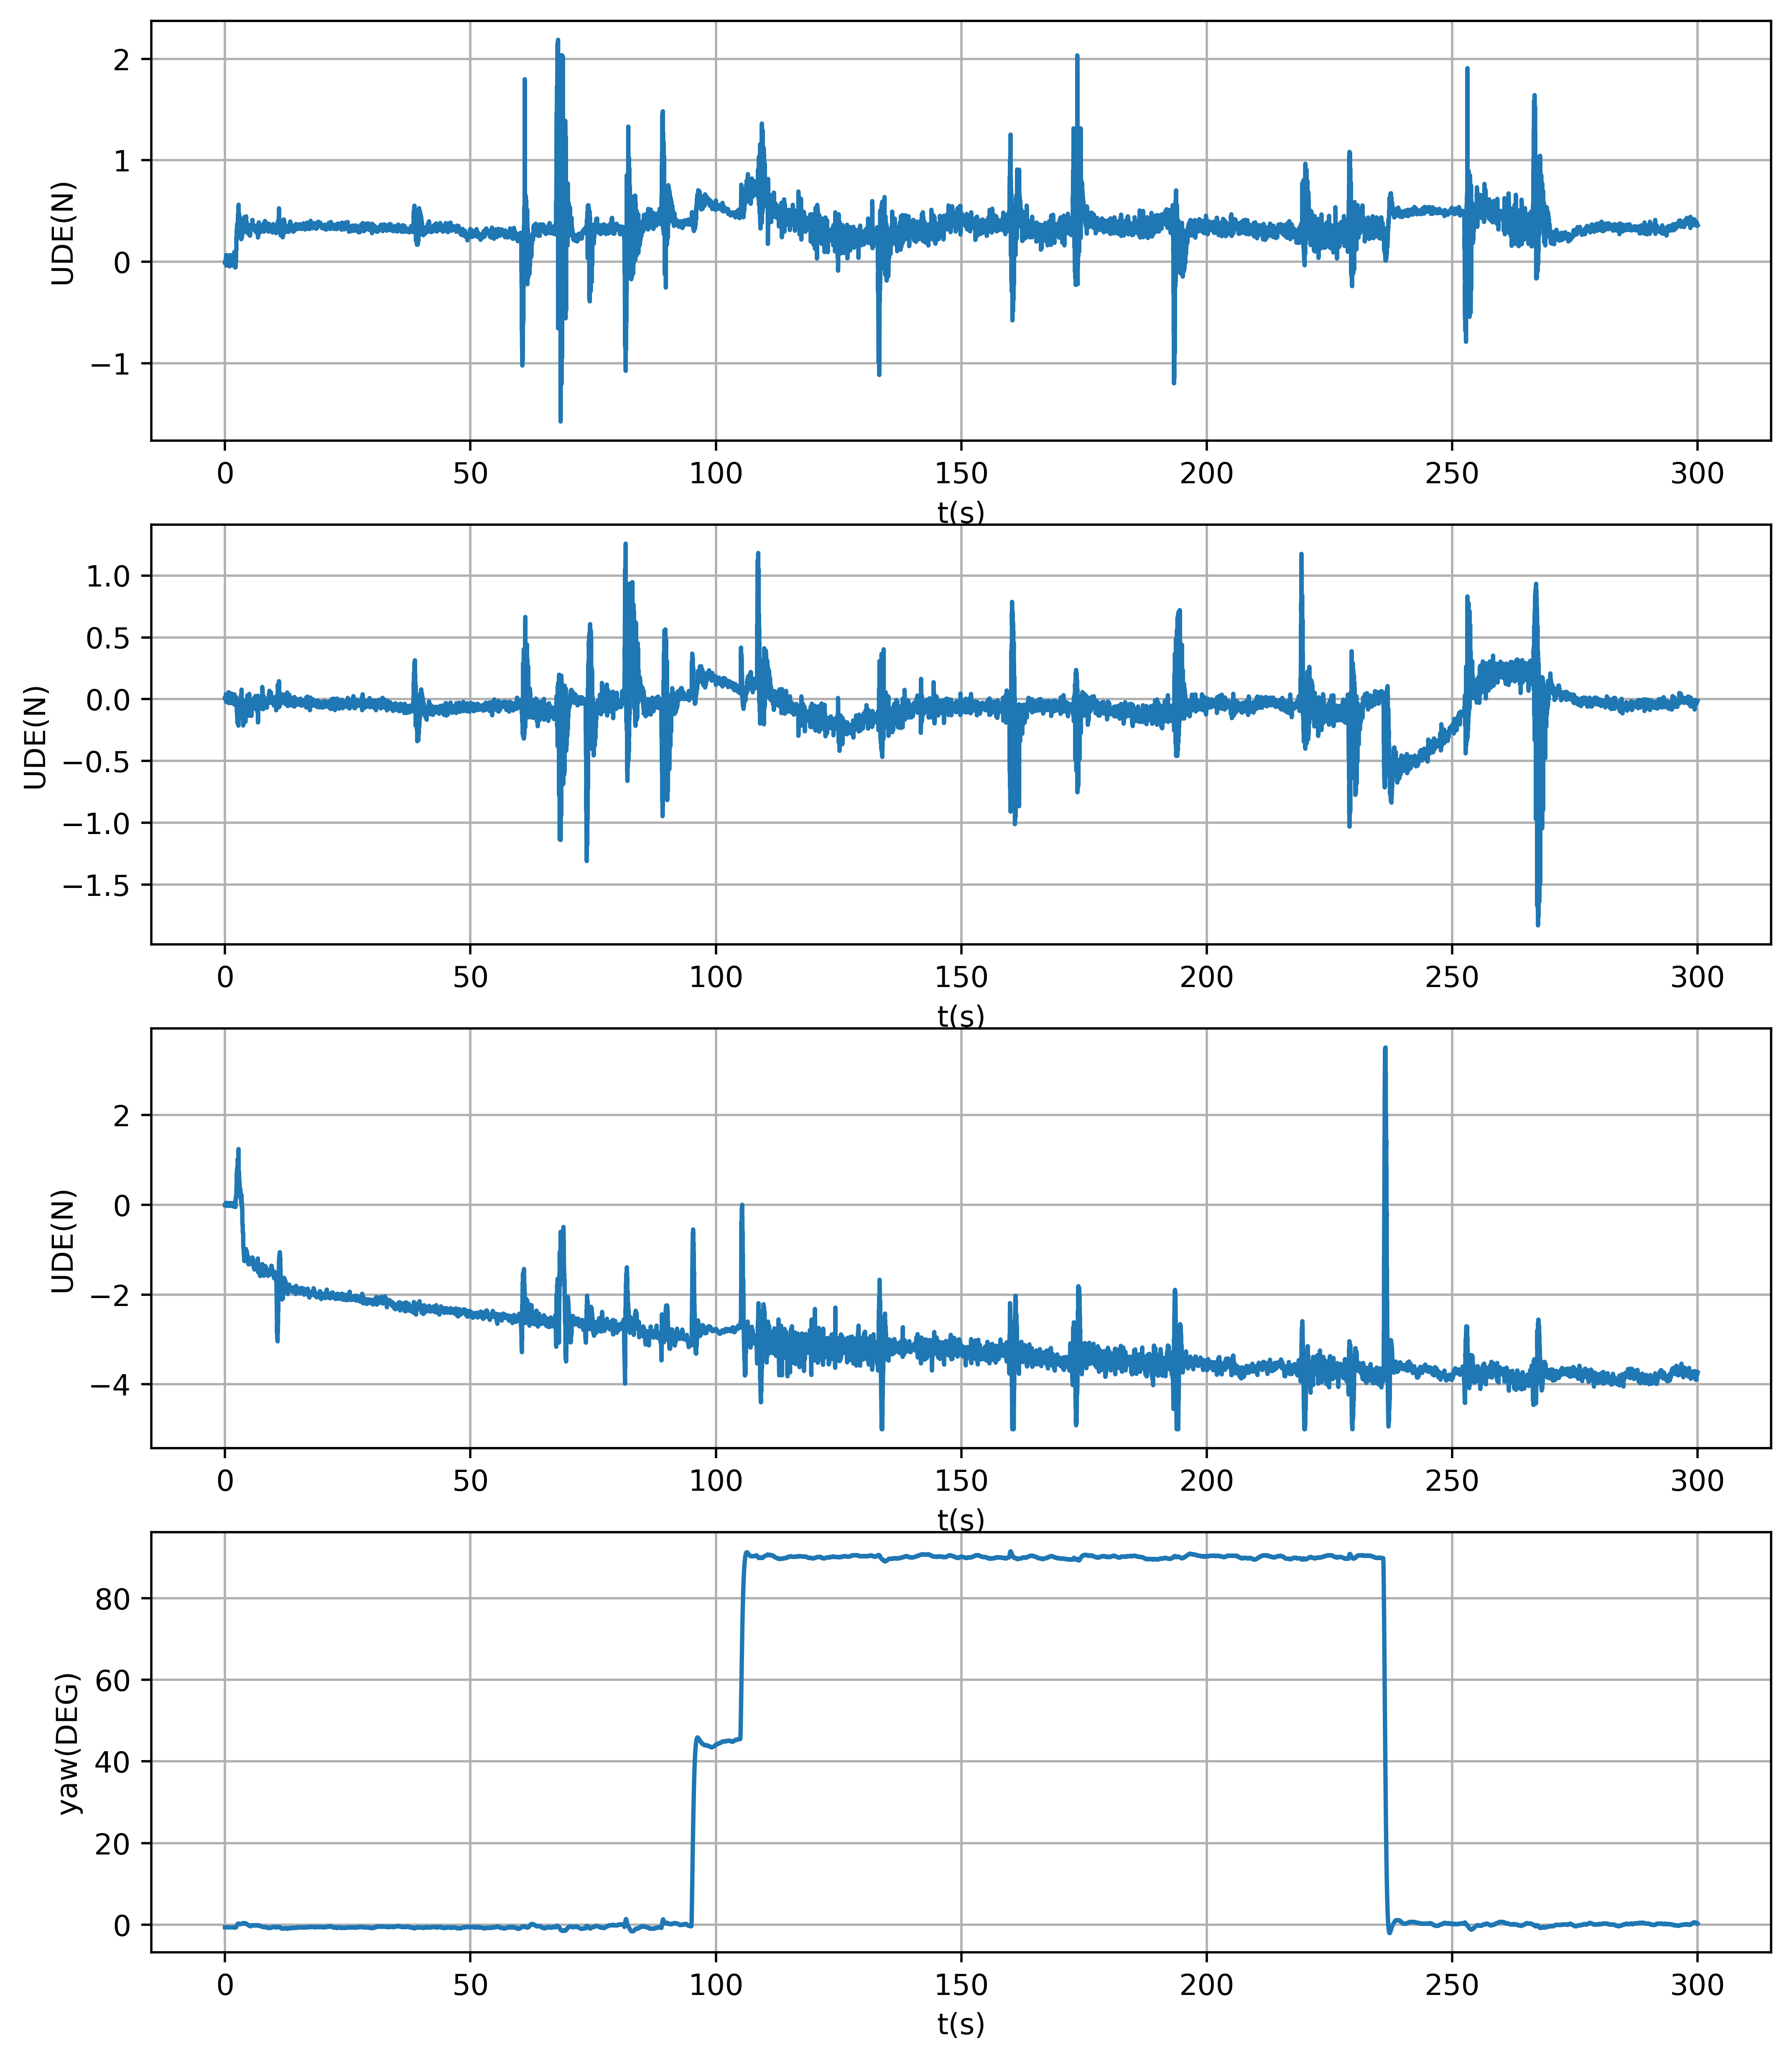

In [8]:
plt.figure(figsize=(10,12), dpi= 500)
plt.subplot(411)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['ude_state.disturbance_estimate.x'])
plt.ylabel('UDE(N)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(412)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['ude_state.disturbance_estimate.y'])
plt.ylabel('UDE(N)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(413)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['ude_state.disturbance_estimate.z'])
plt.ylabel('UDE(N)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(414)
plt.plot(test_data_0["imu"]["processed_time"], yaw)
plt.ylabel('yaw(DEG)')
plt.xlabel('t(s)')
plt.grid(True)

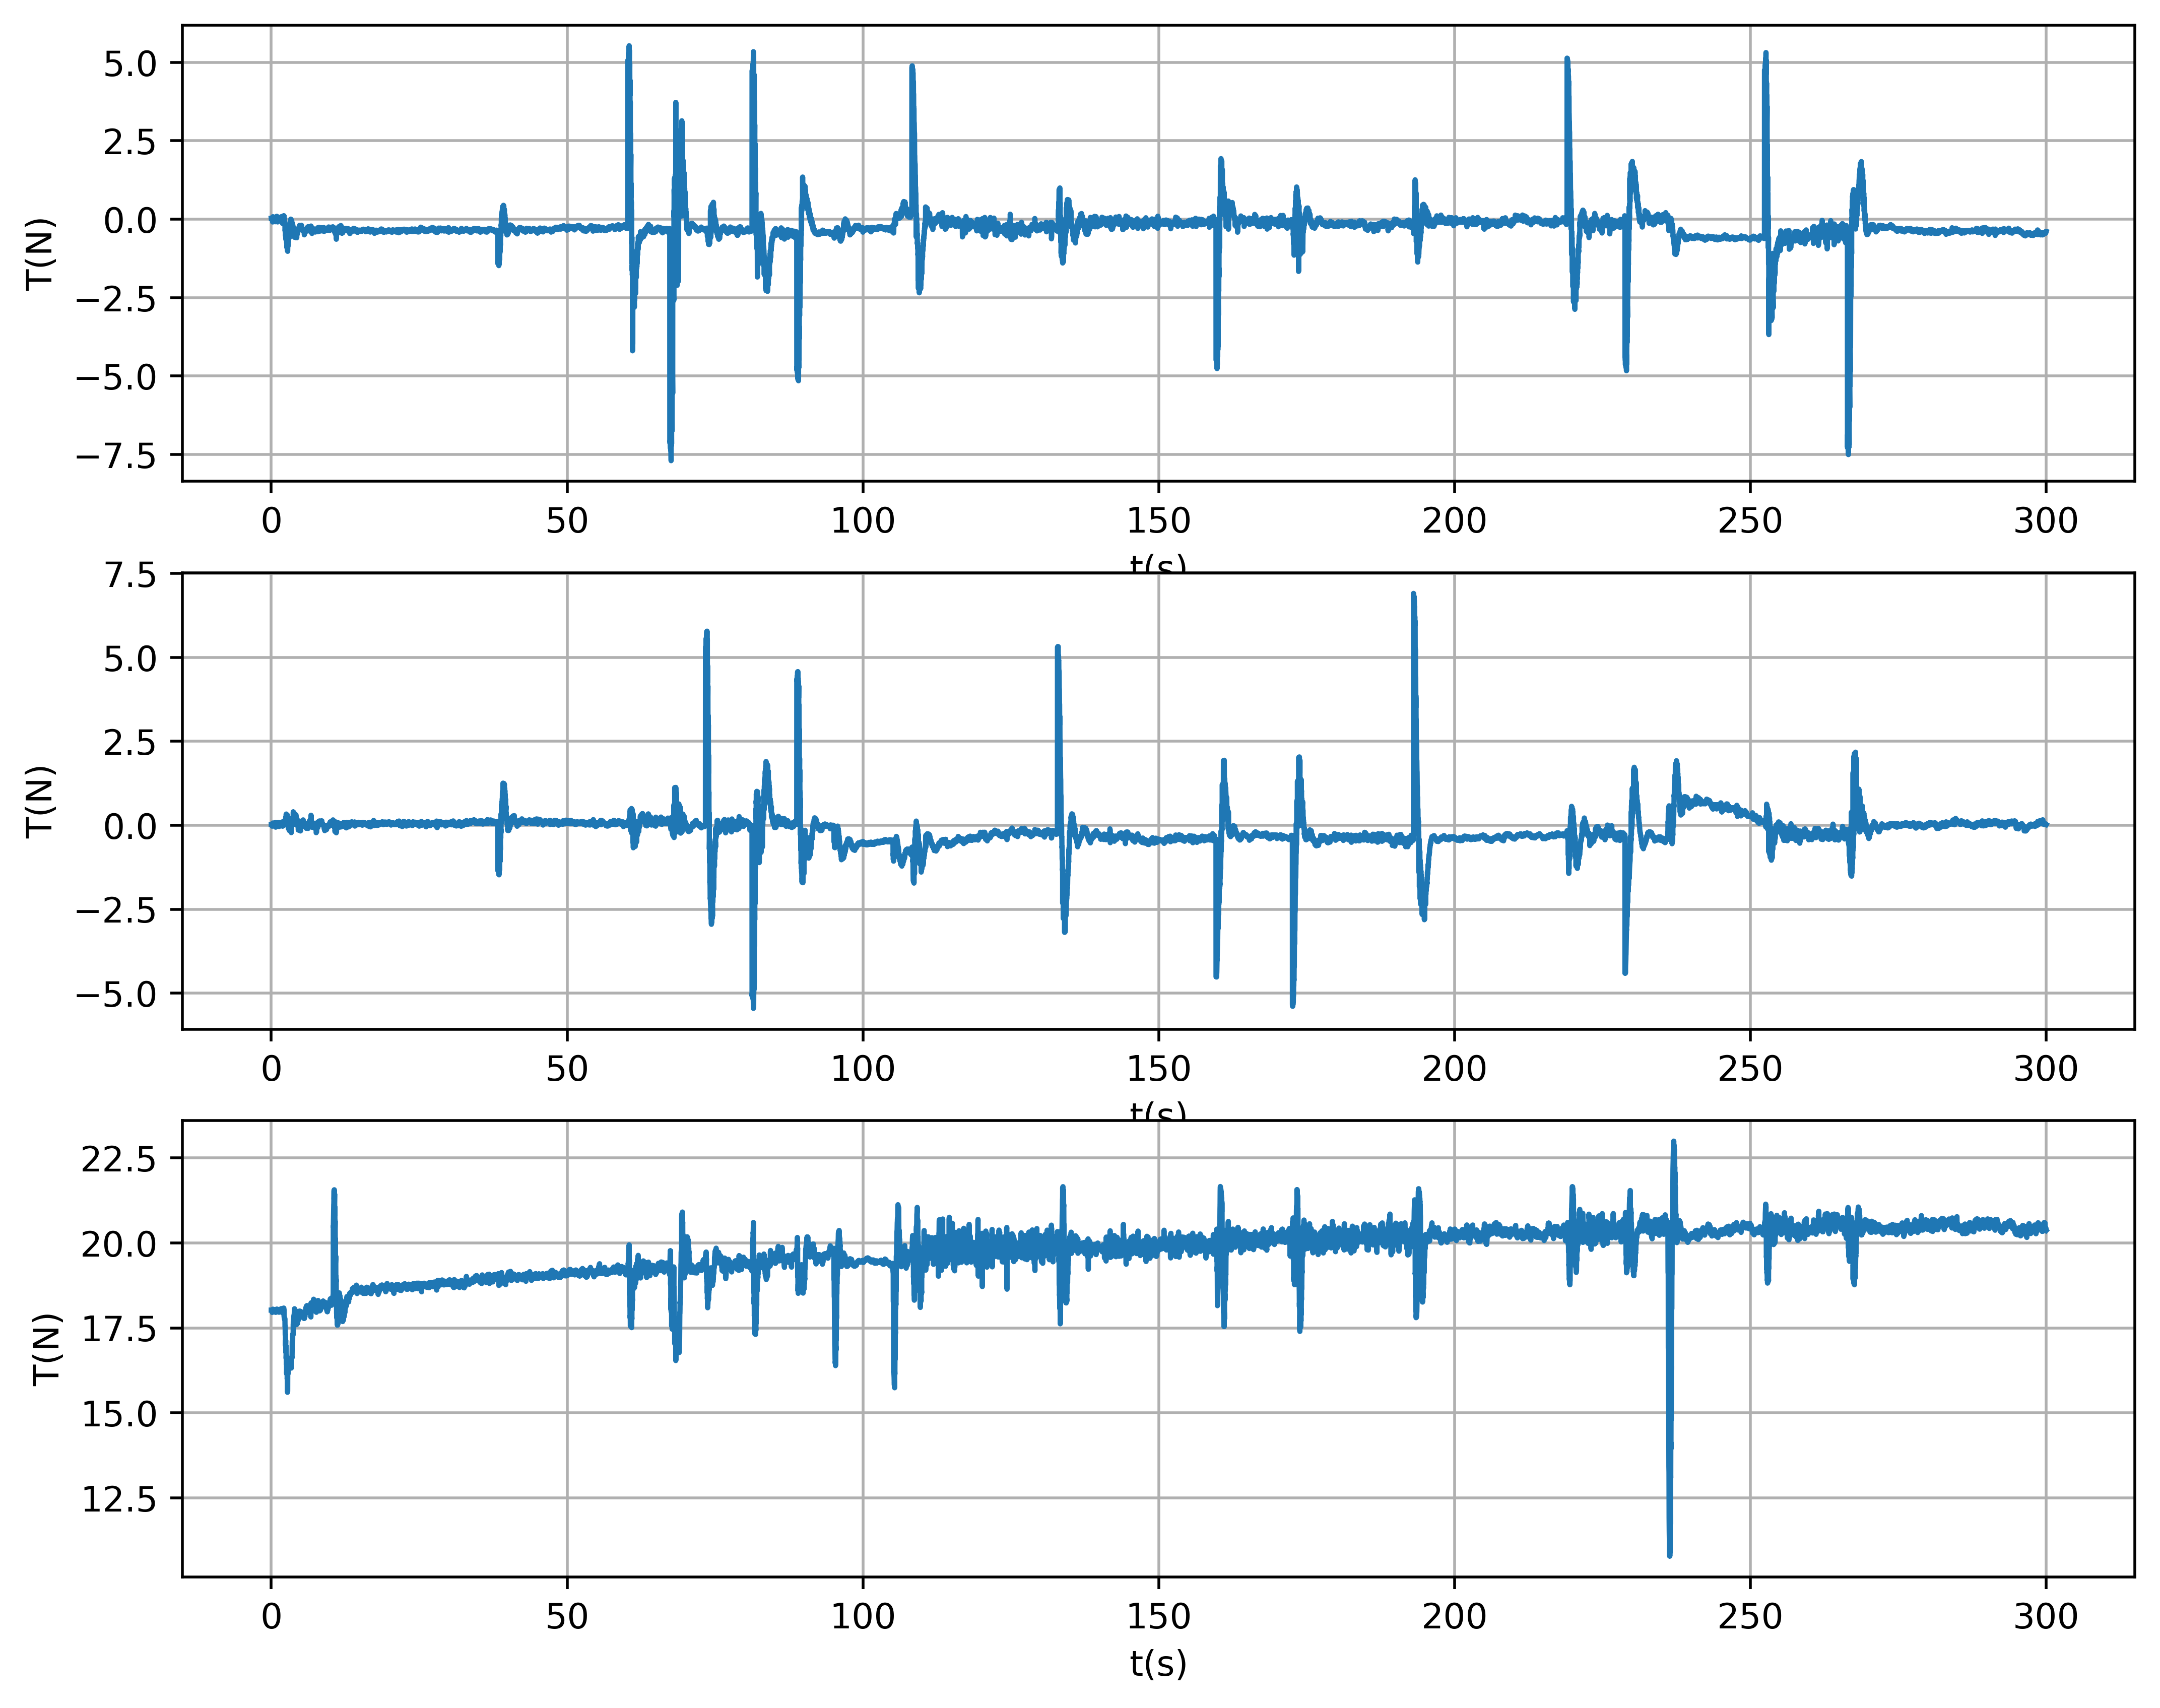

In [9]:
plt.figure(figsize=(10,8), dpi= 500)
plt.subplot(311)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['thrust_setpoint.x'])
plt.ylabel('T(N)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(312)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['thrust_setpoint.y'])
plt.ylabel('T(N)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(313)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['thrust_setpoint.z'])
plt.ylabel('T(N)')
plt.xlabel('t(s)')
plt.grid(True)

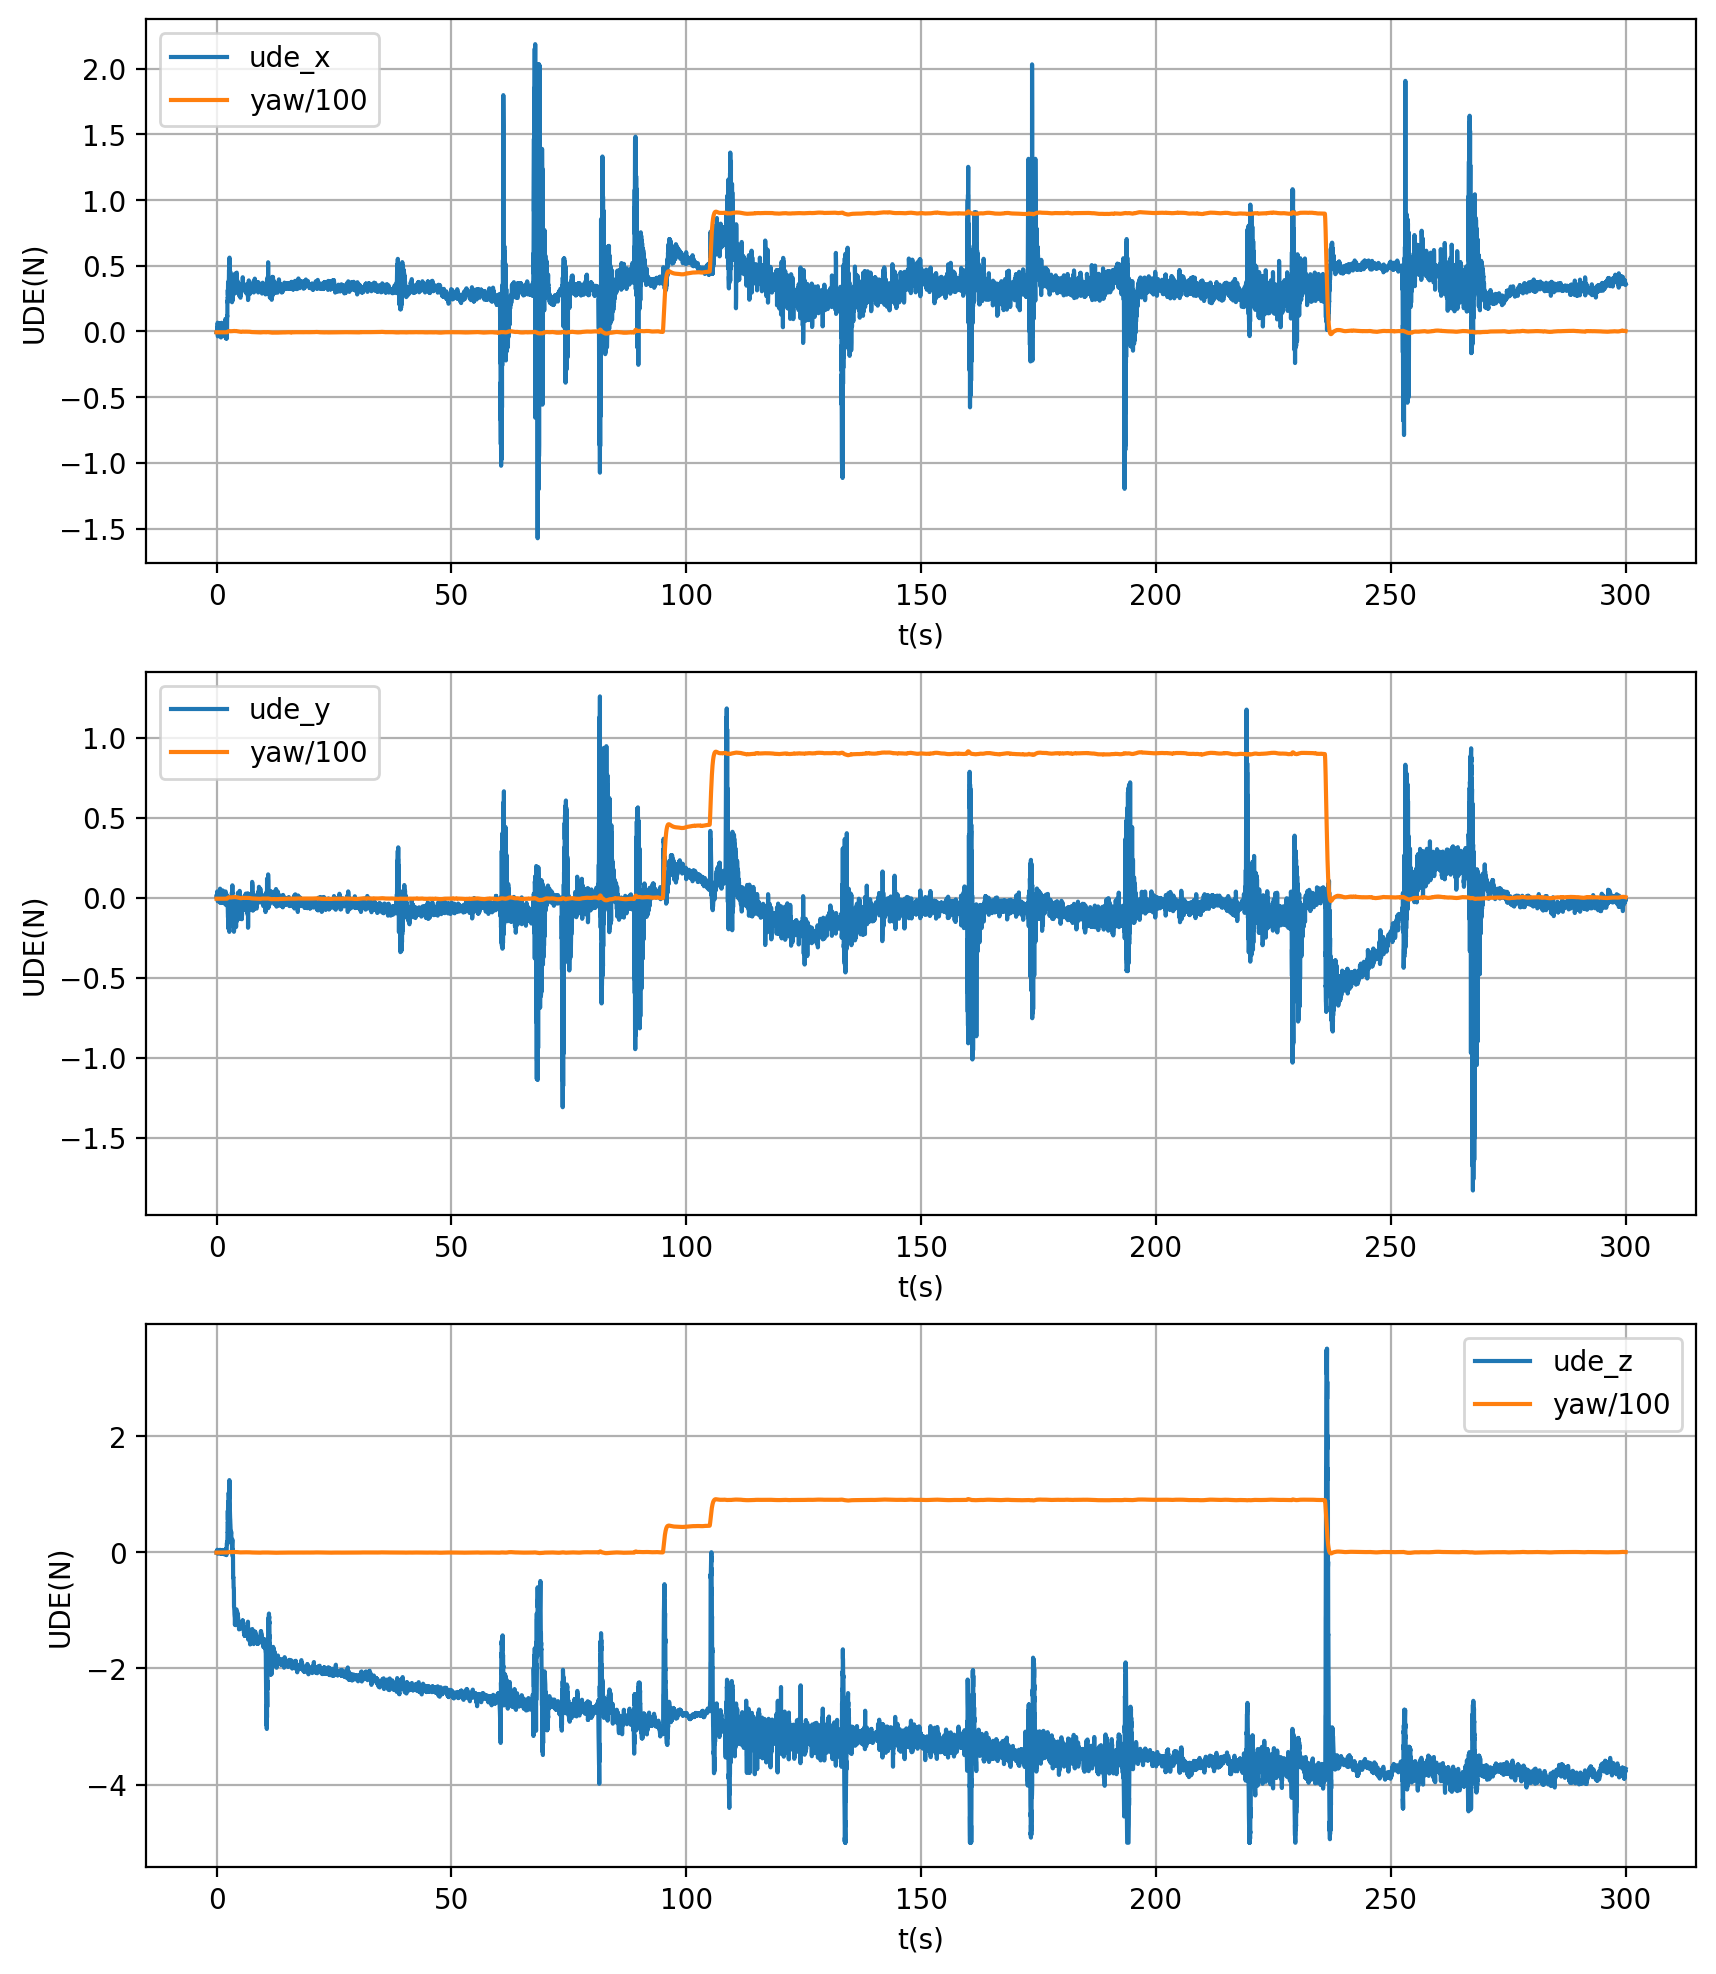

In [10]:
plt.figure(figsize=(10, 12), dpi= 200)
plt.subplot(311)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['ude_state.disturbance_estimate.x'])
plt.plot(test_data_0["imu"]["processed_time"], yaw/100)
plt.legend(['ude_x','yaw/100']) 
plt.ylabel('UDE(N)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(312)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['ude_state.disturbance_estimate.y'])
plt.plot(test_data_0["imu"]["processed_time"], yaw/100)
plt.legend(['ude_y','yaw/100']) 
plt.ylabel('UDE(N)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(313)
plt.plot(test_data_0["output"]["processed_time"], test_data_0["output"]['ude_state.disturbance_estimate.z'])
plt.plot(test_data_0["imu"]["processed_time"], yaw/100)
plt.legend(['ude_z','yaw/100']) 
plt.ylabel('UDE(N)')
plt.xlabel('t(s)')
plt.grid(True)


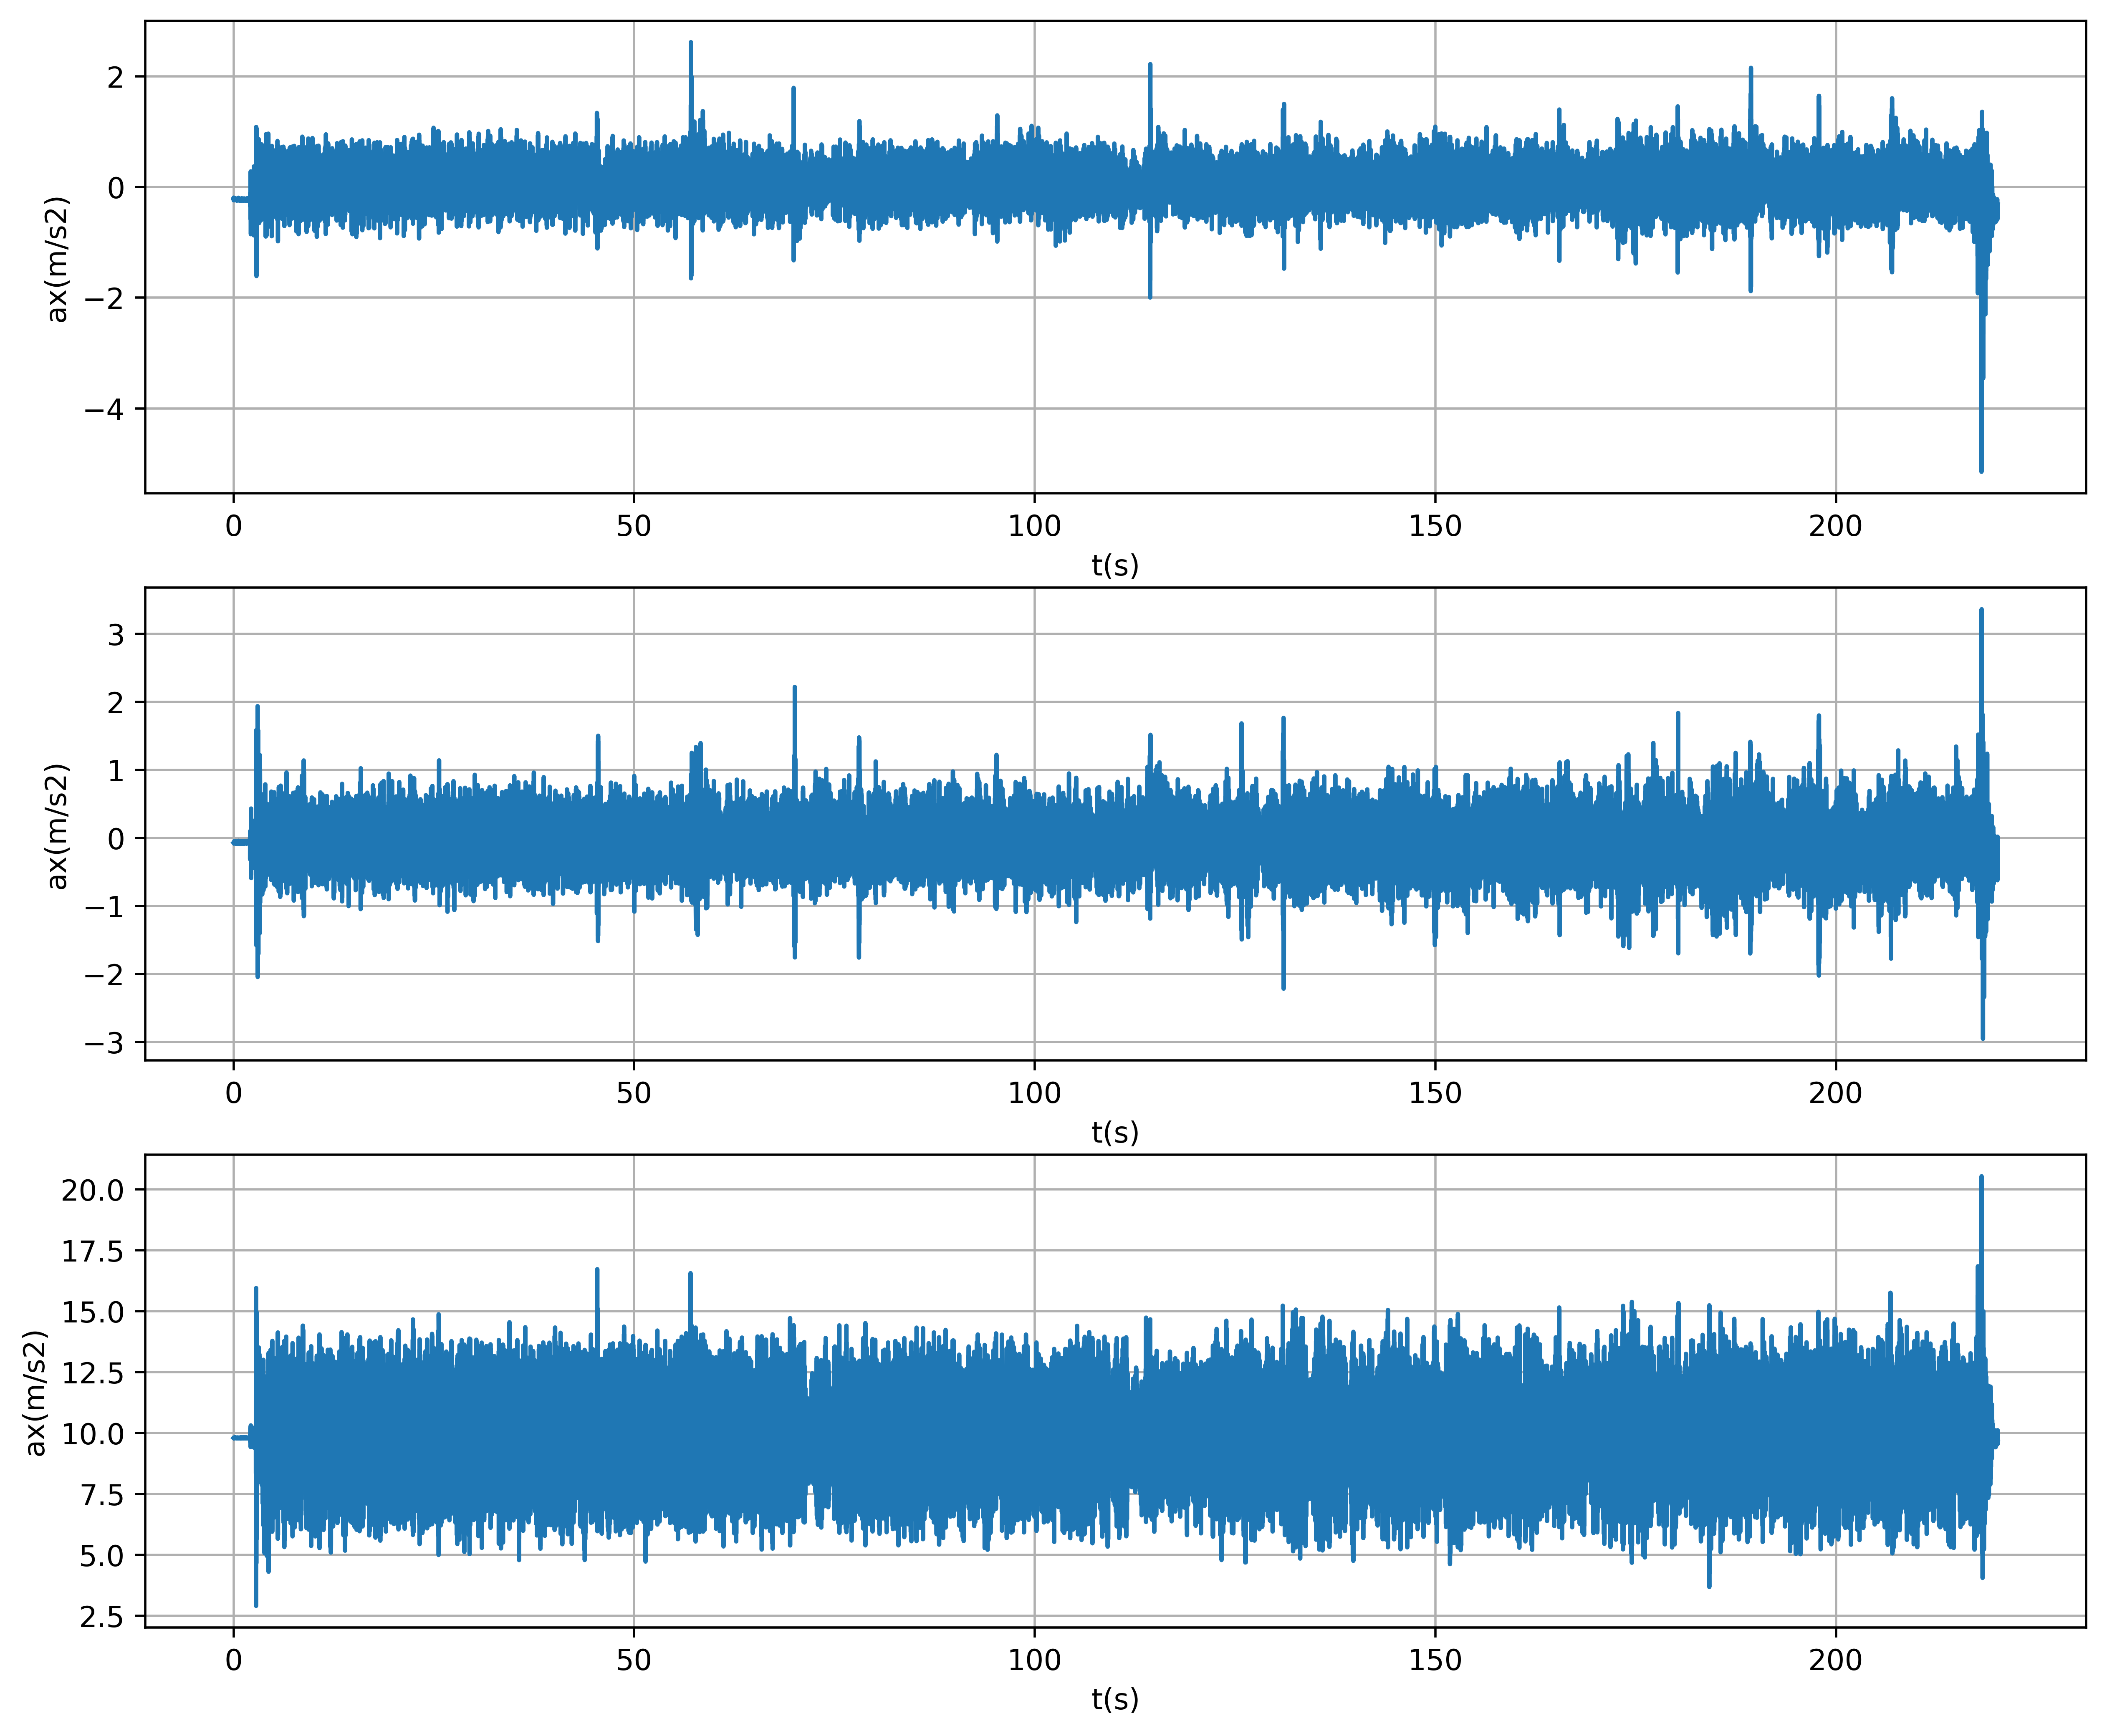

In [45]:
plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(test_data_0["imu"]["processed_time"], test_data_0["imu"]["linear_acceleration.x"])
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(312)
plt.plot(test_data_0["imu"]["processed_time"], test_data_0["imu"]["linear_acceleration.y"])
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.grid(True)
plt.subplot(313)
plt.plot(test_data_0["imu"]["processed_time"], test_data_0["imu"]["linear_acceleration.z"])
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.grid(True)
